In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=pd.read_csv('https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/refs/heads/master/housing.csv')

In [22]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
df=data

In [24]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                      'total_bedrooms', 'population', 'households', 'median_income']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [25]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [26]:

# removed
df = remove_outliers(df, numerical_features)

In [33]:
# Create new features
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


In [34]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,352100.0,0.635043,1.540956,0.972904,False,False,True,False
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,341300.0,0.850682,1.151475,1.043946,False,False,True,False
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,342200.0,0.734958,1.323463,1.207722,False,False,True,False
5,-1.337818,1.038503,1.856182,-0.786942,-0.770978,-0.894071,-0.801787,0.087447,269700.0,0.981485,0.979714,1.115097,False,False,True,False
6,-1.337818,1.033821,1.856182,-0.046188,-0.115979,-0.292712,0.037823,-0.111366,299200.0,-1.221191,2.510990,-7.739084,False,False,True,False


In [35]:

print(df.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  17359.000000  17359.000000        17359.000000  17359.000000   
mean      -0.023118      0.029902            0.100817     -0.254813   
std        1.000363      1.013059            0.976327      0.470028   
min       -2.385992     -1.447568           -2.196180     -1.207283   
25%       -1.113209     -0.792107           -0.686477     -0.587544   
50%        0.479018     -0.618878            0.187562     -0.317554   
75%        0.763522      0.987002            0.743768      0.027612   
max        2.535437      2.958068            1.856182      1.399106   

       total_bedrooms    population    households  median_income  \
count    17359.000000  17359.000000  17359.000000   17359.000000   
mean        -0.262480     -0.252211     -0.261437      -0.117822   
std          0.476630      0.482424      0.486971       0.788126   
min         -1.271720     -1.256123     -1.301368      -1.774299   
25%         -0.60722

**Distribution of Target Variable (median_house_value)**

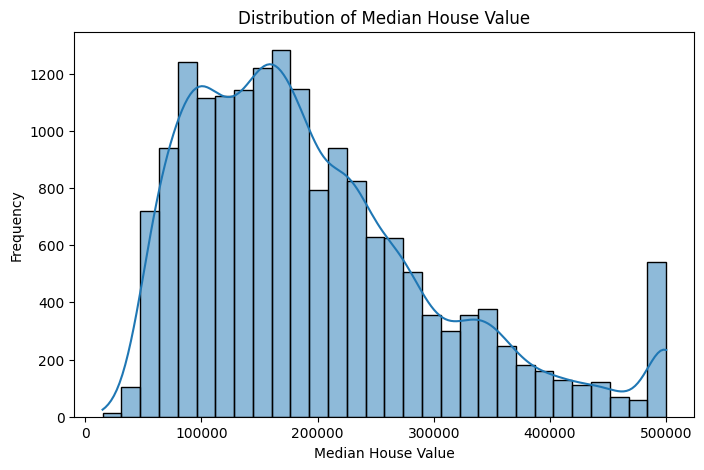

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df['median_house_value'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

**Correlation Heatmap**

'ocean_proximity' column not found in the DataFrame.


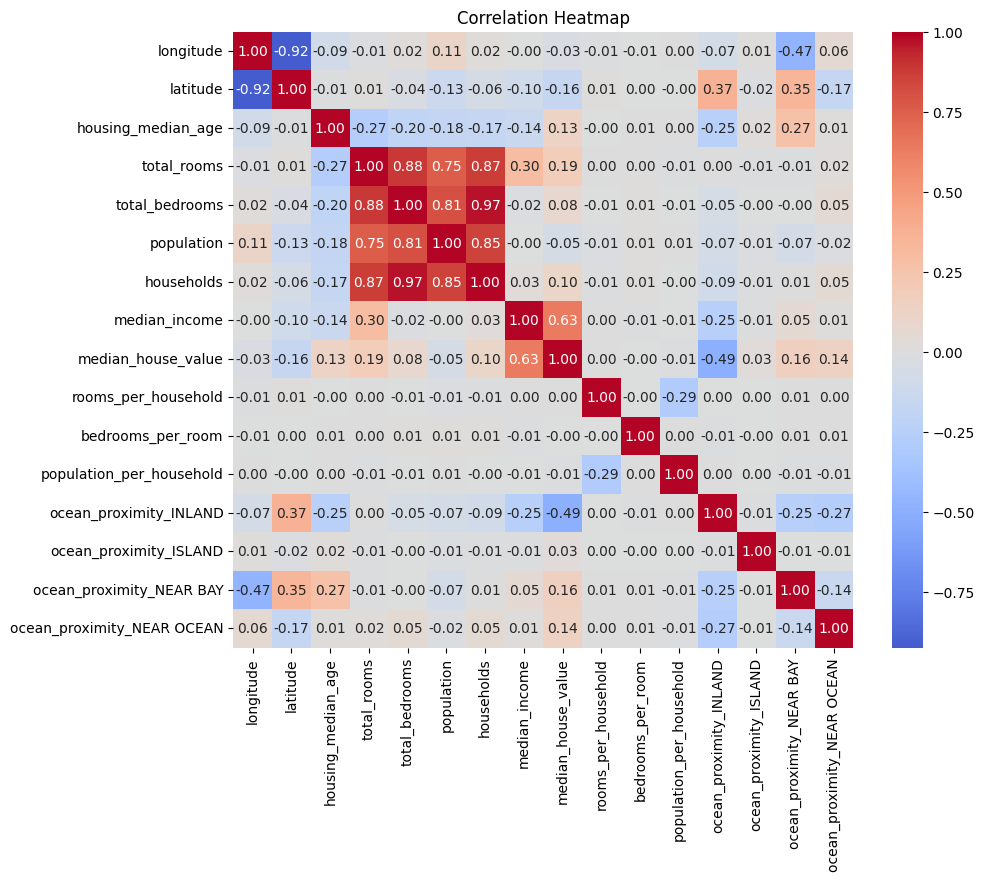

In [38]:
# Check if the 'ocean_proximity' column exists before encoding
if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
else:
    print("'ocean_proximity' column not found in the DataFrame.")

# Calculate the correlation matrix if encoding was successful
if 'ocean_proximity_INLAND' in df.columns:  # Adjust to one of the created dummy columns if available
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Dummy encoding for 'ocean_proximity' was not performed.")


*** Pairplot of Important Features***

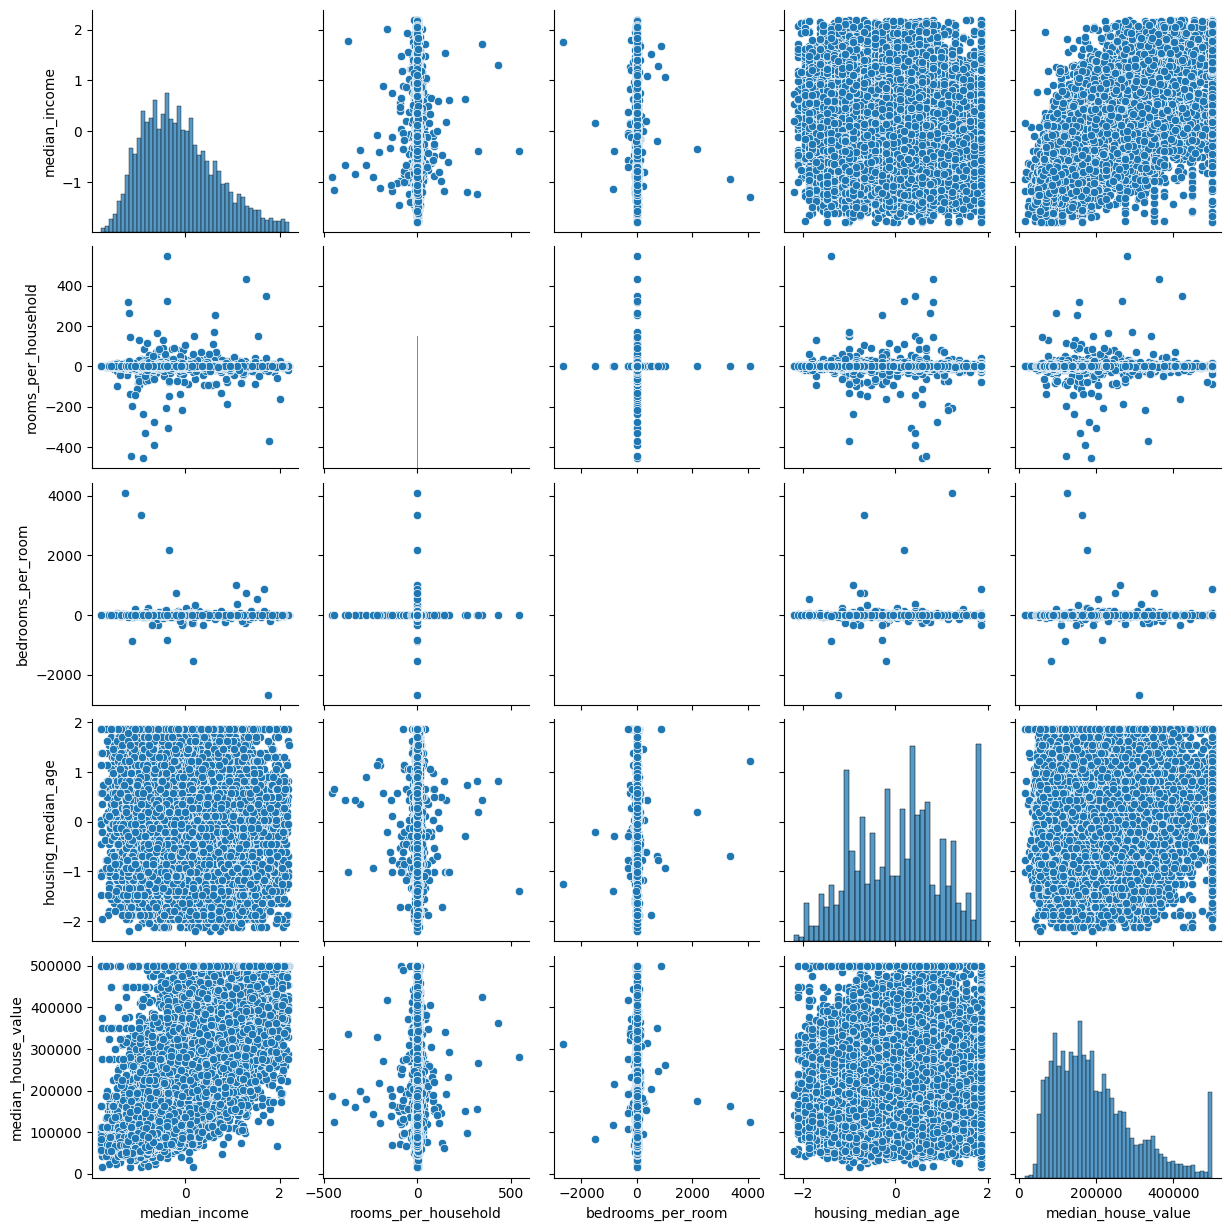

In [39]:
# Pairplot for important features
sns.pairplot(df[['median_income', 'rooms_per_household', 'bedrooms_per_room', 'housing_median_age', 'median_house_value']])
plt.show()


**Distribution of Categorical Feature (ocean_proximity)**

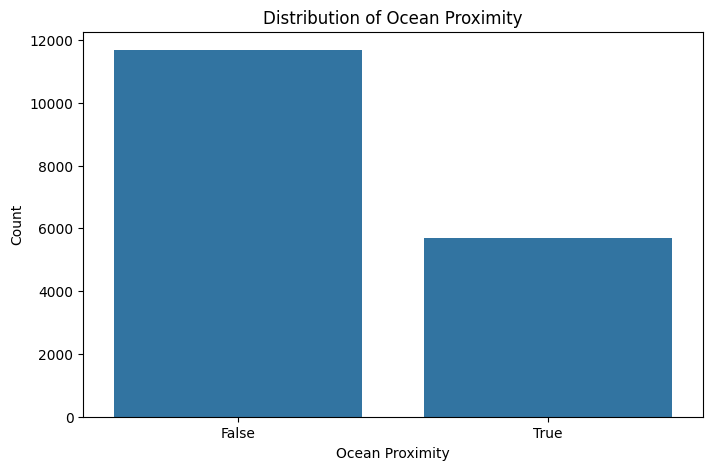

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


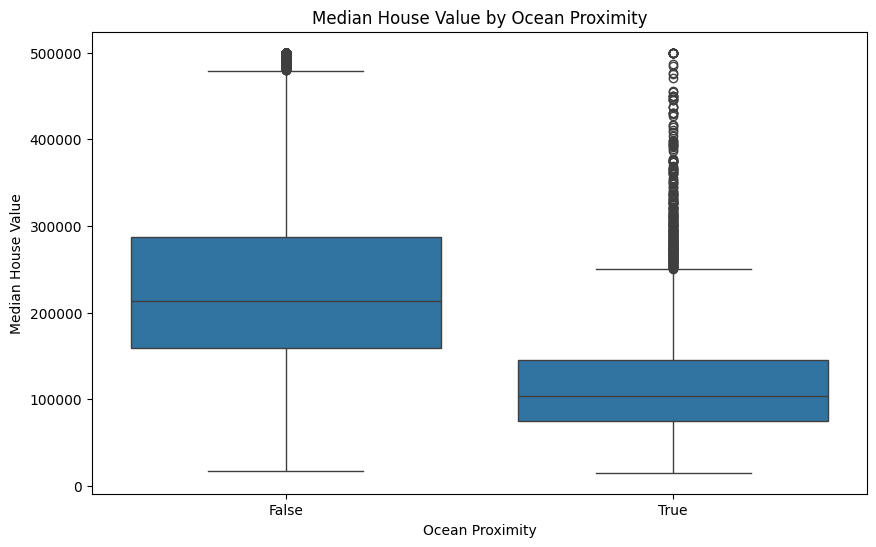

In [40]:
# Distribution of ocean_proximity
plt.figure(figsize=(8, 5))
sns.countplot(x='ocean_proximity_INLAND', data=df)
plt.title('Distribution of Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()

# Median house value by ocean proximity
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity_INLAND', y='median_house_value', data=df)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()


**Relationship Between Median Income and Median House Value**

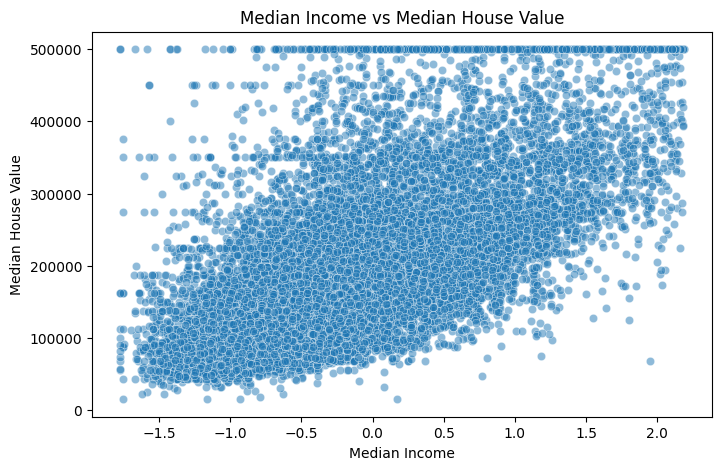

In [41]:
# Scatter plot between median_income and median_house_value
plt.figure(figsize=(8, 5))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


**Room and Household Features Analysis**


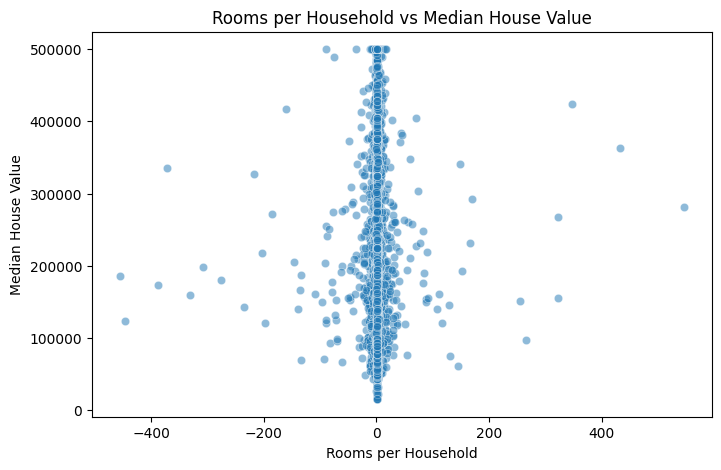

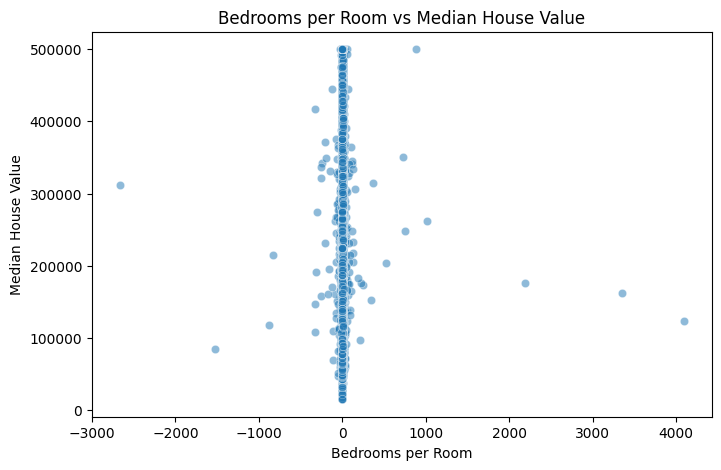

In [42]:
# Rooms per household vs Median House Value
plt.figure(figsize=(8, 5))
sns.scatterplot(x='rooms_per_household', y='median_house_value', data=df, alpha=0.5)
plt.title('Rooms per Household vs Median House Value')
plt.xlabel('Rooms per Household')
plt.ylabel('Median House Value')
plt.show()

# Bedrooms per room vs Median House Value
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bedrooms_per_room', y='median_house_value', data=df, alpha=0.5)
plt.title('Bedrooms per Room vs Median House Value')
plt.xlabel('Bedrooms per Room')
plt.ylabel('Median House Value')
plt.show()


In [43]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,352100.0,0.635043,1.540956,0.972904,False,False,True,False
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,341300.0,0.850682,1.151475,1.043946,False,False,True,False
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,342200.0,0.734958,1.323463,1.207722,False,False,True,False
5,-1.337818,1.038503,1.856182,-0.786942,-0.770978,-0.894071,-0.801787,0.087447,269700.0,0.981485,0.979714,1.115097,False,False,True,False
6,-1.337818,1.033821,1.856182,-0.046188,-0.115979,-0.292712,0.037823,-0.111366,299200.0,-1.221191,2.510990,-7.739084,False,False,True,False


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [46]:

X = df.drop(columns=['median_house_value'])
y = df['median_house_value']


In [48]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Set squared=False for RMSE
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 33483.95
Mean Squared Error (MSE): 2633761448.69
Root Mean Squared Error (RMSE): 51320.19
R-squared (R²): 0.77


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
import pickle

# Save the model to a file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_model, file)

print(f"Model saved to {model_filename}")

Model saved to random_forest_model.pkl
